In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Analysis and Cleaning

In [2]:

# load dataset
dataset = pd.read_csv('Financial-Data.csv',
                      dtype={
                          'pay_schedule': 'category',
                          'home_owner': 'category',
                          'e_signed': 'category'
                      })

In [3]:
dataset

,Entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17903,9949728,31,monthly,0,3245,0,5,3,2,6,...,700,71700,0.691126,0.928196,0.664112,0.838012,0.727705,0.627705,2,0
17904,9442442,46,bi-weekly,0,6525,0,2,1,3,3,...,800,51800,0.648525,0.970832,0.699241,0.844724,0.774918,0.474918,3,0
17905,9857590,46,weekly,0,2685,0,5,1,1,8,...,1200,59650,0.677975,0.918141,0.687981,0.939101,0.472045,0.672045,9,0
17906,8708471,42,bi-weekly,0,2515,0,3,5,6,1,...,400,80200,0.642741,0.885684,0.456448,0.686823,0.406568,0.406568,3,1


In [4]:
dataset = dataset.drop(['Entry_id'], axis=1) # taking out unuseful features

In [5]:
dataset.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17908 entries, 0 to 17907
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   age                   17908 non-null  int64   
 1   pay_schedule          17908 non-null  category
 2   home_owner            17908 non-null  category
 3   income                17908 non-null  int64   
 4   months_employed       17908 non-null  int64   
 5   years_employed        17908 non-null  int64   
 6   current_address_year  17908 non-null  int64   
 7   personal_account_m    17908 non-null  int64   
 8   personal_account_y    17908 non-null  int64   
 9   has_debt              17908 non-null  int64   
 10  amount_requested      17908 non-null  int64   
 11  risk_score            17908 non-null  int64   
 12  risk_score_2          17908 non-null  float64 
 13  risk_score_3          17908 non-null  float64 
 14  risk_score_4          17908 non-null  float64 
 15  ri

In [44]:
dataset['pay_schedule'].nunique()

4

In [6]:
# check the statistics of the dataset
dataset.describe()

,age,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month
count,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,43.015412,3657.214653,1.186006,3.526860,3.584711,3.427183,3.503350,0.795399,950.446449,61086.302211,0.690878,0.878276,0.583155,0.718252,0.623112,0.622068,6.457226
std,11.873107,1504.890063,2.400897,2.259732,2.751937,2.216440,1.955568,0.403421,698.543683,15394.255020,0.090470,0.054563,0.125061,0.120697,0.139729,0.139898,3.673093
min,18.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000
25%,34.000000,2580.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49350.000000,0.640993,0.850882,0.500208,0.633708,0.521735,0.519677,4.000000
50%,42.000000,3260.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699561,0.881004,0.588208,0.725113,0.625944,0.622973,6.000000
75%,51.000000,4670.000000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752887,0.912608,0.672395,0.806681,0.729841,0.728940,8.000000
max,96.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10200.000000,99750.000000,0.999997,0.999024,0.978932,0.996260,0.970249,0.966953,30.000000


## Correlation between features 

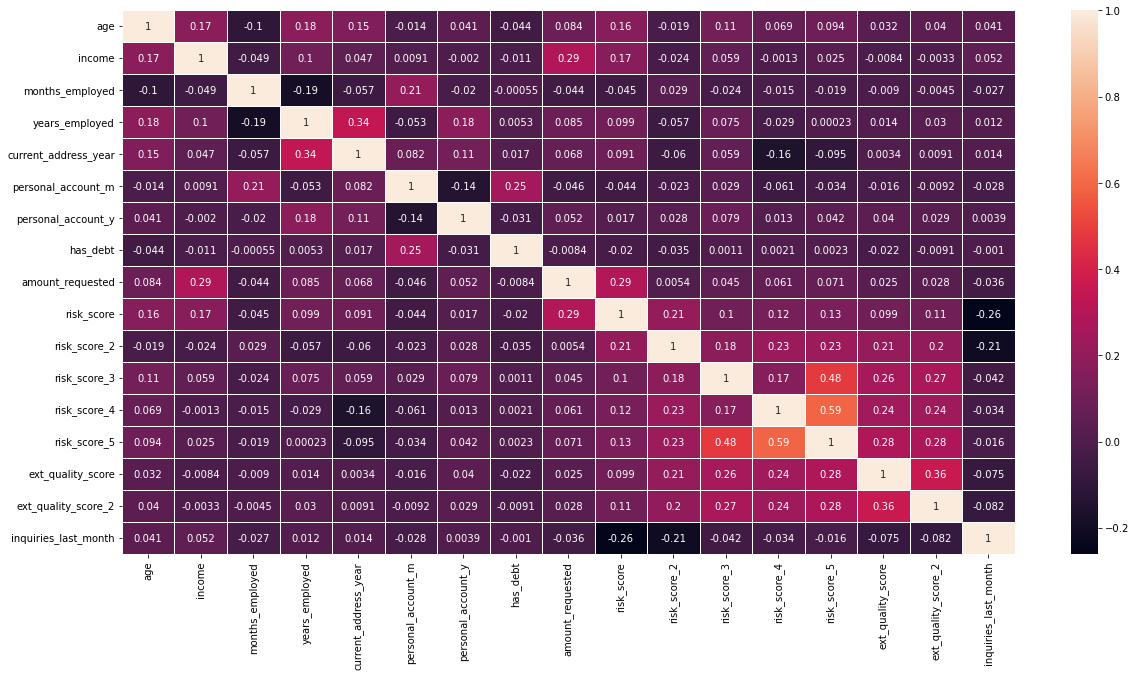

In [7]:
correlation = dataset.corr()
plt.figure(figsize=(20,10))
axis = sns.heatmap(correlation, annot=True, linewidths='0.5')

## Count of all the Unique Values of all Categorical Features

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


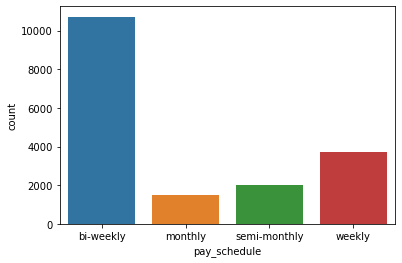

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


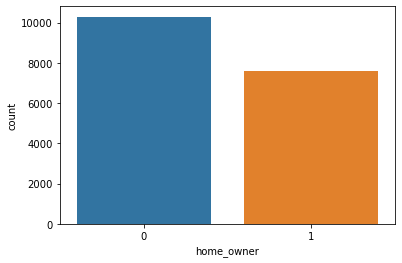

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


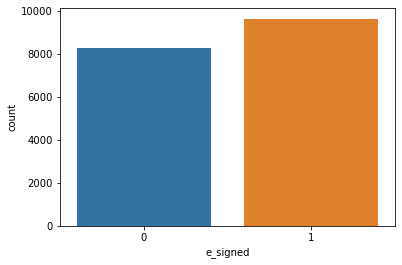

In [8]:
for column in dataset.select_dtypes(include='category').columns:
    sns.countplot(dataset[column])
    plt.show()

## Data Preparation

In [9]:

from sklearn.preprocessing import StandardScaler, OneHotEncoder

def scale_feature(data,feature):
    scaler = StandardScaler()
    scaled_df = pd.DataFrame(scaler.fit_transform(data[[feature]]), columns=[f'scaled_{feature}'])
    
    data = pd.concat([data,scaled_df], axis=1).drop([feature], axis=1)
    return data
    
def one_hot_encode(data,feature,keep_first=True):

    oh = OneHotEncoder()
   
    oh_df = pd.DataFrame(oh.fit_transform(data[[feature]]).toarray()) 
    
    oh_df.columns = oh.get_feature_names()
    
    for col in oh_df.columns:
        oh_df.rename({col:f'{feature}_'+col.split('_')[1]},axis=1,inplace=True)
    
    data = pd.concat([data,oh_df],axis=1)
    data.drop(feature,axis=1,inplace=True)
    
    if keep_first == False:
        data=data.iloc[:,1:]
    
    return data


In [10]:
feature_columns = dataset.select_dtypes(include=['int64', 'float64']).columns

In [11]:
new_dataset = dataset
for column in feature_columns:
    new_dataset = scale_feature(new_dataset, column)

In [12]:
new_dataset = one_hot_encode(new_dataset, 'pay_schedule')

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [13]:
new_dataset

,home_owner,e_signed,scaled_age,scaled_income,scaled_months_employed,scaled_years_employed,scaled_current_address_year,scaled_personal_account_m,scaled_personal_account_y,scaled_has_debt,...,scaled_risk_score_3,scaled_risk_score_4,scaled_risk_score_5,scaled_ext_quality_score,scaled_ext_quality_score_2,scaled_inquiries_last_month,pay_schedule_bi-weekly,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly
0,1,1,-0.253977,-0.347022,-0.493998,-0.233158,-0.212478,1.160820,-0.768775,0.50718,...,0.462623,-0.763184,-1.675935,-0.301983,-1.723802,0.964548,1.0,0.0,0.0,0.0
1,0,0,1.514775,-0.317118,-0.493998,1.094470,-0.212478,-0.643926,1.788098,0.50718,...,0.050418,1.041669,0.896068,0.770140,0.061845,0.692290,0.0,0.0,0.0,1.0
2,0,0,-1.685824,-1.406929,2.005138,-1.560786,-1.302650,1.612007,-1.280150,0.50718,...,-2.047629,0.094863,0.364822,-0.654147,-0.645889,0.147774,0.0,0.0,0.0,1.0
3,0,1,-0.253977,1.045146,-0.493998,1.094470,-0.939260,-0.643926,1.788098,0.50718,...,1.513086,1.476706,0.501921,1.212668,-0.210989,0.420032,1.0,0.0,0.0,0.0
4,0,0,-0.843561,-0.044665,-0.493998,0.651928,-0.575869,-0.643926,2.299472,0.50718,...,-0.379682,0.242545,-0.436878,0.869722,0.876131,1.509063,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17903,0,0,-1.012014,-0.273924,-0.493998,0.651928,-0.212478,-0.643926,1.276723,0.50718,...,0.914937,0.647358,0.992260,0.748562,0.040293,-1.213514,0.0,1.0,0.0,0.0
17904,0,0,0.251381,1.905698,-0.493998,-0.675701,-0.939260,-0.192739,-0.257401,0.50718,...,1.696357,0.928259,1.047870,1.086462,-1.051866,-0.941257,1.0,0.0,0.0,0.0
17905,0,0,0.251381,-0.646055,-0.493998,0.651928,-0.939260,-1.095112,2.299472,0.50718,...,0.730638,0.838226,1.829826,-1.081180,0.357247,0.692290,0.0,0.0,0.0,1.0
17906,0,1,-0.085524,-0.759023,-0.493998,-0.233158,0.514303,1.160820,-1.280150,0.50718,...,0.135780,-1.013181,-0.260403,-1.549794,-1.540449,-0.941257,1.0,0.0,0.0,0.0


## Splitting Dataset into Training and Test sets

In [14]:
train = new_dataset.groupby('e_signed').apply(lambda x: x.sample(frac=.7)).reset_index(drop=True)
test = new_dataset[~new_dataset.index.isin(train.index)]

### Checking how best the train and test samples represent the distribution of the dataset 

In [35]:
temp_train = dataset.groupby('e_signed').apply(lambda x: x.sample(frac=.7)).reset_index(drop=True)
temp_test = dataset[~dataset.index.isin(temp_train.index)]

In [37]:
dataset.describe()

,age,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month
count,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,43.015412,3657.214653,1.186006,3.526860,3.584711,3.427183,3.503350,0.795399,950.446449,61086.302211,0.690878,0.878276,0.583155,0.718252,0.623112,0.622068,6.457226
std,11.873107,1504.890063,2.400897,2.259732,2.751937,2.216440,1.955568,0.403421,698.543683,15394.255020,0.090470,0.054563,0.125061,0.120697,0.139729,0.139898,3.673093
min,18.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000
25%,34.000000,2580.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49350.000000,0.640993,0.850882,0.500208,0.633708,0.521735,0.519677,4.000000
50%,42.000000,3260.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699561,0.881004,0.588208,0.725113,0.625944,0.622973,6.000000
75%,51.000000,4670.000000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752887,0.912608,0.672395,0.806681,0.729841,0.728940,8.000000
max,96.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10200.000000,99750.000000,0.999997,0.999024,0.978932,0.996260,0.970249,0.966953,30.000000


In [36]:
temp_train.describe()

,age,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month
count,12535.000000,12535.000000,12535.000000,12535.000000,12535.000000,12535.000000,12535.000000,12535.000000,12535.000000,12535.000000,12535.000000,12535.000000,12535.000000,12535.000000,12535.000000,12535.000000,12535.000000
mean,43.117351,3663.639649,1.200399,3.540487,3.599681,3.419226,3.492302,0.796171,953.752692,61045.065816,0.691022,0.878282,0.582527,0.718078,0.622449,0.621316,6.477782
std,11.939366,1511.297951,2.419480,2.260363,2.753085,2.216644,1.948168,0.402860,696.996746,15328.828685,0.090242,0.054617,0.125389,0.120622,0.139663,0.140490,3.660949
min,18.000000,1015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.500752,0.016724,0.153367,0.010184,0.010184,1.000000
25%,34.000000,2575.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49400.000000,0.641067,0.850899,0.499278,0.633955,0.521063,0.518010,4.000000
50%,43.000000,3260.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61150.000000,0.699544,0.880039,0.588187,0.725468,0.624738,0.622789,6.000000
75%,51.000000,4685.000000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72650.000000,0.752896,0.913595,0.671918,0.806063,0.729433,0.728522,8.000000
max,96.000000,9970.000000,11.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10100.000000,99750.000000,0.999948,0.999012,0.978932,0.996260,0.970249,0.961244,30.000000


In [38]:
temp_test.describe()

,age,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month
count,5373.000000,5373.000000,5373.000000,5373.000000,5373.000000,5373.000000,5373.000000,5373.000000,5373.000000,5373.000000,5373.000000,5373.000000,5373.000000,5373.000000,5373.000000,5373.000000,5373.000000
mean,42.870463,3659.189838,1.146101,3.553322,3.547366,3.397729,3.510143,0.795087,938.191699,60791.075749,0.693022,0.876810,0.583034,0.717067,0.622418,0.619645,6.435697
std,12.017531,1516.967695,2.358123,2.253564,2.730894,2.195535,1.959032,0.403676,686.689468,15598.410120,0.088814,0.055093,0.123803,0.120337,0.139986,0.140039,3.691648
min,18.000000,1130.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2250.000000,0.112800,0.500752,0.019622,0.171135,0.012841,0.010184,1.000000
25%,33.000000,2575.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49050.000000,0.642952,0.849782,0.501935,0.635155,0.519157,0.516897,4.000000
50%,42.000000,3260.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,60350.000000,0.702093,0.880993,0.585423,0.724126,0.625833,0.619923,6.000000
75%,52.000000,4670.000000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72800.000000,0.753656,0.911396,0.671319,0.804277,0.729263,0.724992,8.000000
max,86.000000,9915.000000,11.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10100.000000,99750.000000,0.999997,0.998934,0.978932,0.989404,0.958013,0.964559,30.000000


In [15]:
from sklearn.utils import shuffle

np.random.seed(42)
train = shuffle(train)
test = shuffle(test)

In [16]:

feature_train = train.drop(['e_signed'], axis=1)
target_train = train['e_signed']

feature_test = test.drop(['e_signed'], axis=1)
target_test = test['e_signed']

## Model Creation and Evaluation 

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [18]:
lr = LogisticRegression()
svm = SVC()
rf = RandomForestClassifier()


In [19]:
models = [lr, svm, rf]
for model in models:
    model.fit(feature_train, target_train)

In [20]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
def calculate_metrics(estimator,y_true, y_pred):
    results = pd.DataFrame([[estimator, accuracy_score(y_true, y_pred), precision_score(y_true, y_pred),
                  f1_score(y_true, y_pred), recall_score(y_true, y_pred)]], 
                 columns=['Model', 'accuracy_score', 'precision_score', 'f1_score', 'recall_score'])
    print(results, '\n\n')
    return results

In [21]:
for model in models: calculate_metrics(str(model).removesuffix('()'), target_test.astype(int), model.predict(feature_test).astype(int))

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


                Model  accuracy_score  precision_score  f1_score  recall_score
0  LogisticRegression        0.579564         0.592113  0.645536      0.709555 


  Model  accuracy_score  precision_score  f1_score  recall_score
0   SVC        0.672995         0.667351  0.721597      0.785443 


                    Model  accuracy_score  precision_score  f1_score  \
0  RandomForestClassifier        0.891122           0.8893  0.900358   

   recall_score  
0      0.911694   




In [45]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = range(10,501, 50)

search_parameters = {
    'n_estimators':n_estimators
}

In [46]:
best_rf = RandomizedSearchCV(estimator=rf, param_distributions=search_parameters, verbose=3, cv=5, random_state=42, refit=True)

In [47]:
best_rf.fit(feature_train, target_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ...................n_estimators=10;, score=0.567 total time=   0.2s
[CV 2/5] END ...................n_estimators=10;, score=0.568 total time=   0.2s
[CV 3/5] END ...................n_estimators=10;, score=0.560 total time=   0.2s
[CV 4/5] END ...................n_estimators=10;, score=0.584 total time=   0.2s
[CV 5/5] END ...................n_estimators=10;, score=0.587 total time=   0.2s
[CV 1/5] END ...................n_estimators=60;, score=0.611 total time=   1.3s
[CV 2/5] END ...................n_estimators=60;, score=0.624 total time=   1.3s
[CV 3/5] END ...................n_estimators=60;, score=0.613 total time=   1.3s
[CV 4/5] END ...................n_estimators=60;, score=0.617 total time=   1.3s
[CV 5/5] END ...................n_estimators=60;, score=0.635 total time=   1.3s
[CV 1/5] END ..................n_estimators=110;, score=0.619 total time=   2.4s
[CV 2/5] END ..................n_estimators=110;

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'n_estimators': range(10, 501, 50)},
                   random_state=42, verbose=3)

In [48]:
best_rf.best_estimator_

RandomForestClassifier(n_estimators=410)

In [49]:
best_rf.best_score_

0.6375747905863582

In [50]:
best_rf.best_params_

{'n_estimators': 410}

In [51]:
best_rf = best_rf.best_estimator_

In [52]:
best_rf.fit(feature_train, target_train)

RandomForestClassifier(n_estimators=410)

In [54]:
predictions = best_rf.predict(feature_test).astype(int)
calculate_metrics(estimator=best_rf, y_true=target_test.astype(int), y_pred=predictions)

                                               Model  accuracy_score  \
0  (DecisionTreeClassifier(max_features='auto', r...        0.895031   

   precision_score  f1_score  recall_score  
0         0.891647  0.904082      0.916868   




,Model,accuracy_score,precision_score,f1_score,recall_score
0,"(DecisionTreeClassifier(max_features='auto', r...",0.895031,0.891647,0.904082,0.916868


In [55]:
from joblib import Parallel, delayed
import joblib
  
saved_model = best_rf
file_name = 'best_E-signing_Prediction_RFClassifier.pkl'

joblib.dump(saved_model, file_name)
  

['best_E-signing_Prediction_RFClassifier.pkl']

In [57]:
loaded_model = joblib.load(file_name)
loaded_model.predict(feature_test.iloc[:5])

array(['1', '0', '1', '0', '1'], dtype=object)

### Conclusion

The random forest classifier tops all the classifiers in terms of accuracy, precision, recall and f1 scores.
The greater the number of trees in the Random Forest Ensemble, the better the evaluation results, but this comes at the cost of high computational resources.